In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import plot_confusion_matrix

import plotly.graph_objs as go
from plotly.offline import iplot


from pprint import pprint

from nltk.corpus import stopwords

from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models import LdaModel 
from gensim.corpora import Dictionary
from pprint import pprint 
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords


import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from pprint import pprint 
from textblob import TextBlob

from nltk.corpus import stopwords
from pprint import pprint
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [ ]:
## Para instalar
!pip install textblob
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
Datos= pd.read_json('Datos.json', lines=True, orient='records')

In [ ]:
Datos

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [ ]:
datos=Datos.sample(n=5000, random_state=1)

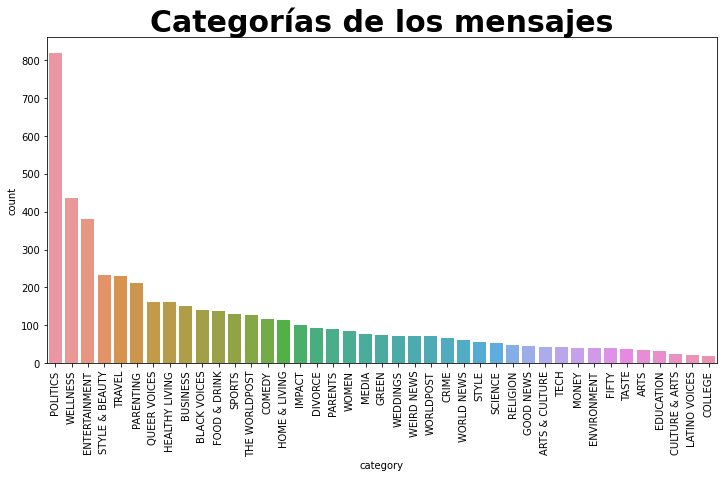

In [ ]:
sns.countplot(x='category', data=datos, order=datos['category'].value_counts().index)
plt.title('Categorías de los mensajes', weight='bold', size=30, y=1)
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords_sp = stopwords.words('english')

In [ ]:
stopwords = stopwords.words('english')

### Realizar la limpieza de los datos y guardarlos en la columna ''PP'

In [ ]:
#Nueva columna 

spanishStemmer = SnowballStemmer("english")

def pre_procesado(m):
    m = m.lower()
    m = re.sub(r"[\W\d_]+", " ", m)
    m = [palabra for palabra in m.split() if palabra not in stopwords_sp]
    m = " ".join(m)
    m = [spanishStemmer.stem(palabra) for palabra in m.split()]
    m = " ".join(m)
    return (m)

Datos['pp'] = datos['short_description'].apply(lambda m: pre_procesado(m))


In [ ]:
# Matriz TF-IDF

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(datos['pp'].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index = datos.index
tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix.columns = datos['category']
tfidf_matrix

category,GOOD NEWS,WELLNESS,WELLNESS,POLITICS,POLITICS,SCIENCE,DIVORCE,BUSINESS,POLITICS,STYLE & BEAUTY,TRAVEL,SPORTS,TRAVEL,TRAVEL,PARENTING,WOMEN,WOMEN,TECH,POLITICS,SCIENCE,ENTERTAINMENT,POLITICS,GREEN,MONEY,THE WORLDPOST,BUSINESS,ENTERTAINMENT,POLITICS,MONEY,SPORTS,WORLD NEWS,STYLE & BEAUTY,POLITICS,WELLNESS,EDUCATION,THE WORLDPOST,ENTERTAINMENT,PARENTING,DIVORCE,QUEER VOICES,...,MEDIA,QUEER VOICES,WELLNESS,WELLNESS,PARENTING,QUEER VOICES,QUEER VOICES,ARTS,WORLD NEWS,WEIRD NEWS,POLITICS,BUSINESS,FOOD & DRINK,ENTERTAINMENT,WORLD NEWS,ENTERTAINMENT,SPORTS,BLACK VOICES,BUSINESS,MONEY,GREEN,POLITICS,POLITICS,WEIRD NEWS,PARENTING,CULTURE & ARTS,TECH,POLITICS,POLITICS,TRAVEL,WELLNESS,WEDDINGS,BUSINESS,ARTS,STYLE & BEAUTY,WELLNESS,FIFTY,COMEDY,STYLE & BEAUTY,ENTERTAINMENT
aapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aarp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zouki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuburbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucchini,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# ENTRENAMIENTO Y PRUEBA

In [ ]:
train, test = train_test_split(datos, test_size=0.2, random_state=42)

print(f"Tenemos {datos.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 5000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 4000 datos.
El conjunto de datos de prueba (test) tiene 1000 datos.


In [ ]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [ ]:
X_train = tfidf_vect.fit_transform(train.short_description.values)
y_train = train.category.values

X_test = tfidf_vect.transform(test.short_description.values)
y_test = test.category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (4000, 8038)
Tamaño de X_test (prueba): (1000, 8038)
Tamaño de y_train 4000 y tamaño de y_test 1000


# NUBE DE PALABRAS PARA LOS DATOS

In [ ]:
!pip install wordcloud

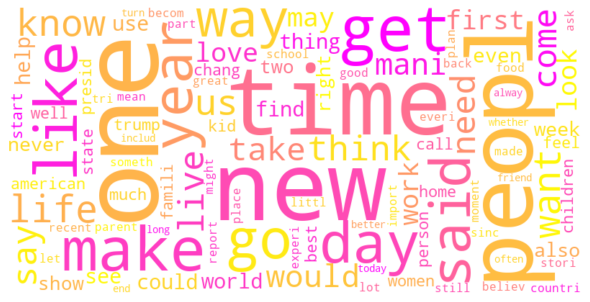

In [ ]:
palabras = datos.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras) 
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
img = PIL.Image.open("corazon.png")

In [ ]:
mask = np.array(img)

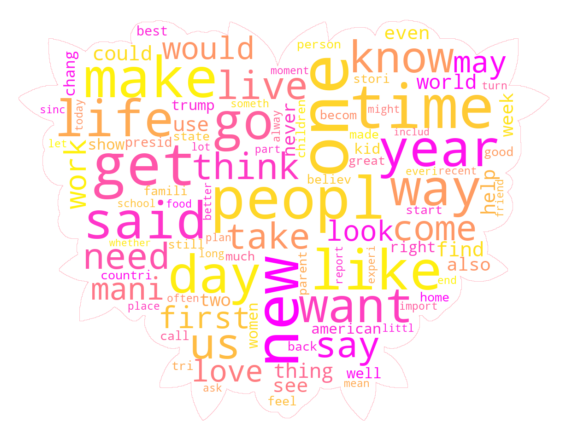

In [ ]:
palabras = datos.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# CATEGORIES

In [ ]:
datos.category.value_counts(normalize=True)

POLITICS          0.1640
WELLNESS          0.0874
ENTERTAINMENT     0.0762
STYLE & BEAUTY    0.0466
TRAVEL            0.0462
PARENTING         0.0422
QUEER VOICES      0.0324
HEALTHY LIVING    0.0322
BUSINESS          0.0302
BLACK VOICES      0.0280
FOOD & DRINK      0.0274
SPORTS            0.0258
THE WORLDPOST     0.0254
COMEDY            0.0234
HOME & LIVING     0.0226
IMPACT            0.0200
DIVORCE           0.0186
PARENTS           0.0180
WOMEN             0.0172
MEDIA             0.0152
GREEN             0.0148
WEDDINGS          0.0146
WEIRD NEWS        0.0144
WORLDPOST         0.0142
CRIME             0.0132
WORLD NEWS        0.0124
STYLE             0.0112
SCIENCE           0.0108
RELIGION          0.0098
GOOD NEWS         0.0092
ARTS & CULTURE    0.0088
TECH              0.0088
MONEY             0.0082
ENVIRONMENT       0.0082
FIFTY             0.0082
TASTE             0.0076
ARTS              0.0072
EDUCATION         0.0062
CULTURE & ARTS    0.0048
LATINO VOICES     0.0044


# POLITICS

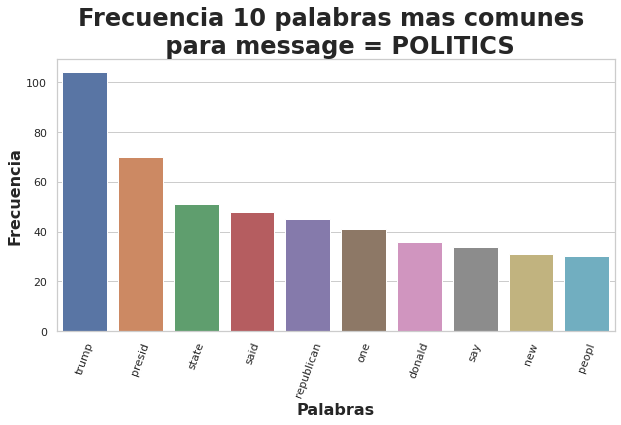

In [ ]:
politics = datos[datos['category'] == 'POLITICS']
politics = collections.Counter(politics['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in politics], y=[val[1] for val in politics])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = POLITICS', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

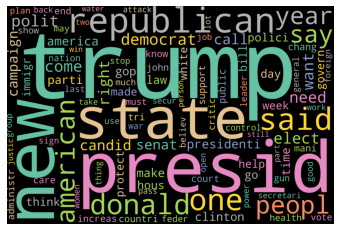

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'POLITICS']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
img = PIL.Image.open("politica.png")

In [ ]:
mask = np.array(img)

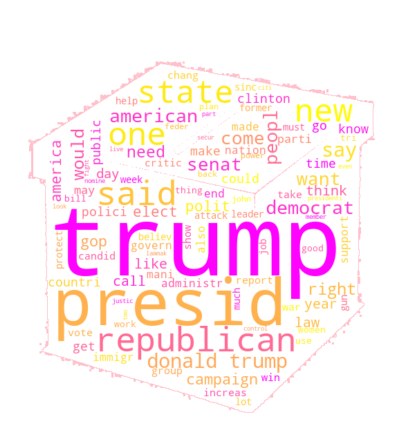

In [ ]:
palabras = datos[datos['category'] == 'POLITICS']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# WELLNESS

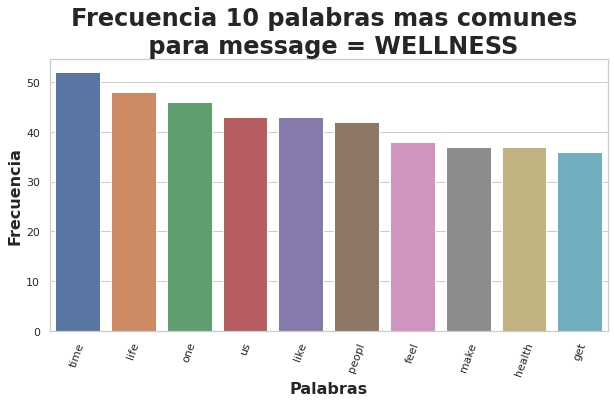

In [ ]:
wellness = datos[datos['category'] == 'WELLNESS']
wellness = collections.Counter(wellness['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in wellness], y=[val[1] for val in wellness])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = WELLNESS', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

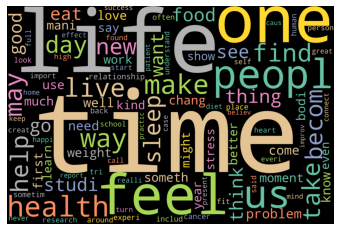

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'WELLNESS']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
img = PIL.Image.open("arbol.png")

In [ ]:
mask = np.array(img)

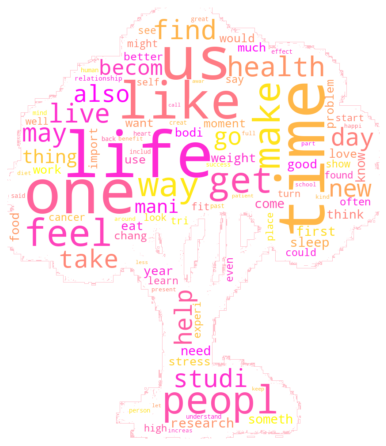

In [ ]:
palabras = datos[datos['category'] == 'WELLNESS']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ENTERTAINMENT

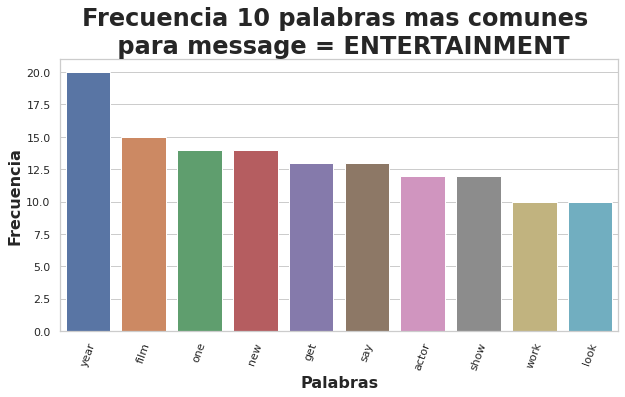

In [ ]:
entertainment = datos[datos['category'] == 'ENTERTAINMENT']
entertainment = collections.Counter(entertainment['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in entertainment], y=[val[1] for val in entertainment])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = ENTERTAINMENT', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

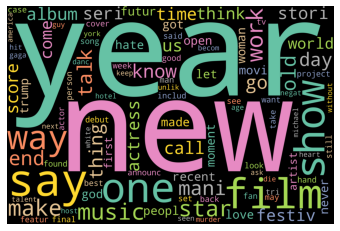

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'ENTERTAINMENT']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
img = PIL.Image.open("radio.png")

In [ ]:
mask = np.array(img)

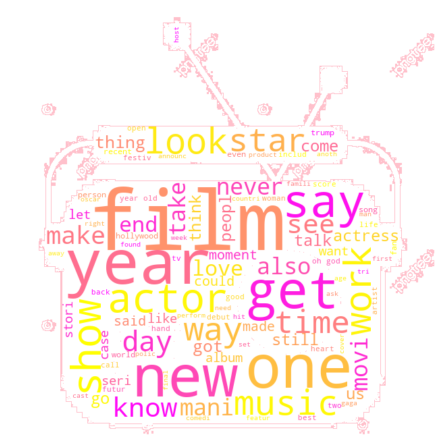

In [ ]:
palabras = datos[datos['category'] == 'ENTERTAINMENT']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# STYLE & BEAUTY

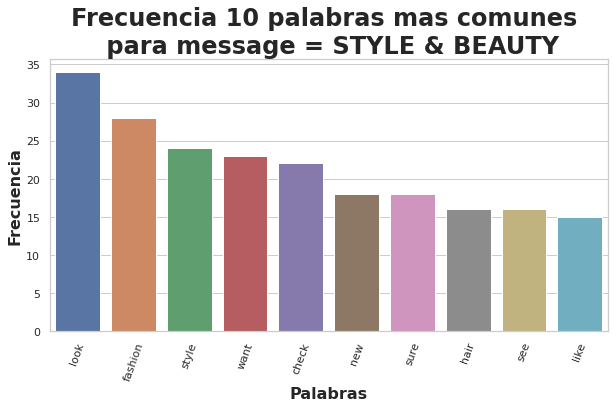

In [ ]:
style = datos[datos['category'] == 'STYLE & BEAUTY']
style = collections.Counter(style['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in style], y=[val[1] for val in style])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = STYLE & BEAUTY', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

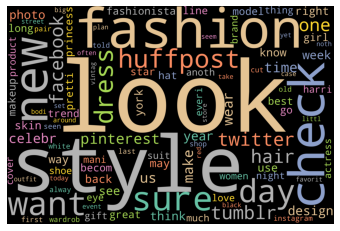

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'STYLE & BEAUTY']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
img = PIL.Image.open("pelo.png")

In [ ]:
mask = np.array(img)

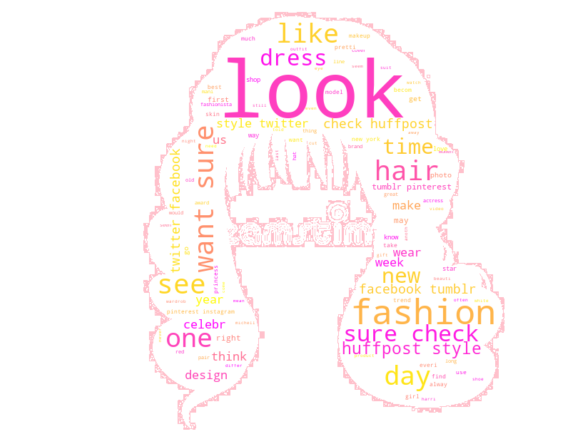

In [ ]:
palabras = datos[datos['category'] == 'STYLE & BEAUTY']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# TRAVEL

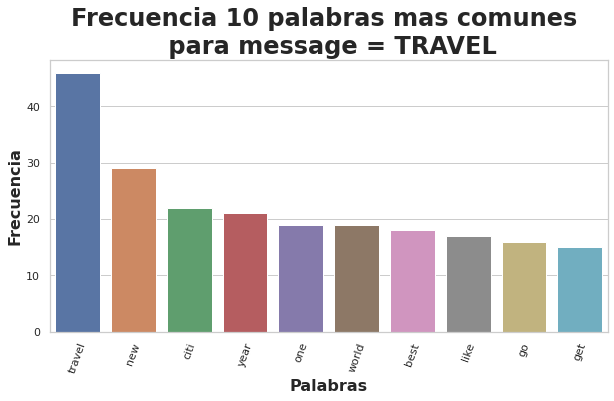

In [ ]:
travel = datos[datos['category'] == 'TRAVEL']
travel = collections.Counter(travel['pp'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in travel], y=[val[1] for val in travel])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = TRAVEL', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

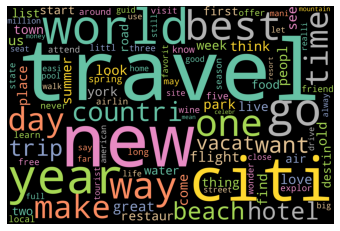

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['category'] == 'TRAVEL']['pp'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
img = PIL.Image.open("maleta.png")

In [ ]:
mask = np.array(img)

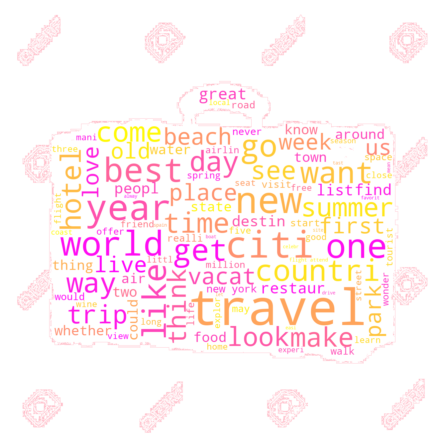

In [ ]:
palabras = datos[datos['category'] == 'TRAVEL']['pp'].str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1, contour_color='pink').generate(palabras) 

wordcloud.to_file("nlp_flor.png")

plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# ANÁLISIS DE SENTIMIENTO

In [ ]:
pd.set_option('display.max_colwidth', None)

datos['sent_vader'] = datos['short_description'].apply(lambda val: vader.polarity_scores(val)['compound'])
datos['sent_textblob'] = datos['short_description'].apply(lambda val: TextBlob(val).sentiment.polarity)
datos[['short_description', 'sent_vader', 'sent_textblob']].head()

datos[['short_description', 'sent_vader']].sort_values('sent_vader').tail()

,short_description,sent_vader
98376,"We all have a dream. To do the very thing that we love to do that makes us feel fulfilled, vibrant, and more alive. The very thing that excites us every day and leaves us in a state of wonder over all of our opportunities for creation.",0.9696
146861,"Good sex is about a mutual appreciation and attraction in the moment, but great sex is about loving one another's imperfections and a real desire for heightened energy and a deeper connection.",0.9729
129475,"One of the greatest gifts available among the many that great relationships offer, is the assistance that our partner provides in the face of the challenges that life inevitably serves up to us. We can meet those challenges with confidence, and can afford to take on those that are bigger, grander, and more exciting, resting into the assurance that we are fully supported.",0.9732
126663,"The Internet has been a boon for the sharing of wisdom, roadmaps, and advice, but it has also created a whole marketplace for the sharing of what appears to be a single correct route to success. Advice on hacking our lives toward better performance and productivity and happiness is the dieting advice of this decade.",0.9753
154321,"Each of these five things can help you shift your daily experience in small but profound ways, as they have mine. This spiritual salve will help you gain insight, peace, and clarity, and make it easier for you to deal with the next moment in a healthy way.",0.9789


In [ ]:
# Más positivo
maxs = datos.max()
maxs

category                                                                                                                         WORLDPOST
headline                                                               ‘Yes' Is Better Than ‘No' When It Comes To Consensual Sex On Campus
authors                                                                                            steve harmon, Contributor\nentrepreneur
link                 https://www.huffingtonpost.comhttps://www.yahoo.com/beauty/beauty-and-the-feet-213559435.html?soc_src=mail&soc_trk=ma
short_description                                                                                                                      😻😻😻
date                                                                                                                   2018-05-25 00:00:00
pp                                                                                                                                       ツ
sent_vader                 

In [ ]:
#Más negativo
min = datos.min()
min

category                                                                                                   ARTS
headline                                                                                                       
authors                                                                                                        
link                 https://www.huffingtonpost.com/entry/-adoption-needs-to-become_us_5b9b63f2e4b03a1dcc772b09
short_description                                                                                              
date                                                                                        2012-01-28 00:00:00
pp                                                                                                             
sent_vader                                                                                              -0.9781
sent_textblob                                                                                           

Todos tenemos un sueño. Hacer exactamente lo que amamos hacer que nos haga sentir realizados, vibrantes y más vivos. Eso mismo que nos emociona todos los días y nos deja en un estado de asombro por todas nuestras oportunidades para la creación. (Puntaje: 0.9696)

# MODELOS SUPERVISADOS

In [ ]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#### Exactitud

print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.22
Regresión Logística:    0.23
SVM:                    0.27
Árbol de decisión:      0.19


In [ ]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()


Naive Bayes
                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00        11
ARTS & CULTURE       0.00      0.00      0.00        11
  BLACK VOICES       0.00      0.00      0.00        20
      BUSINESS       0.00      0.00      0.00        30
       COLLEGE       0.00      0.00      0.00         4
        COMEDY       0.00      0.00      0.00        13
         CRIME       0.00      0.00      0.00        18
CULTURE & ARTS       0.00      0.00      0.00         1
       DIVORCE       0.00      0.00      0.00        19
     EDUCATION       0.00      0.00      0.00         3
 ENTERTAINMENT       0.38      0.04      0.07        74
   ENVIRONMENT       0.00      0.00      0.00         8
         FIFTY       0.00      0.00      0.00        14
  FOOD & DRINK       0.00      0.00      0.00        36
     GOOD NEWS       0.00      0.00      0.00         5
         GREEN       0.00      0.00      0.00        12
HEALTHY LIVING       0.00      0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
%config InlineBackend.figure_format = 'svg'

### Predicciones

In [ ]:
nuevos = ["CNNs Jim Acosta discusses with Jim Avlon and Margaret Hoover former President Donald Trump's remarks about Kentucky Derby winner Medina Spirit. The racehorse tested positive for elevated levels of betamethasone, a corticosteroid. Trump said that now horses are addicted." ]
nuevos_trans = tfidf_vect.transform(nuevos)
nb.predict(nuevos_trans)

# nb.predict_proba(nuevos_trans)

array(['POLITICS'], dtype='<U14')

In [ ]:
logreg.predict(nuevos_trans)

array(['POLITICS'], dtype=object)

In [ ]:
svm.predict(nuevos_trans)


array(['POLITICS'], dtype=object)

In [ ]:
dt.predict(nuevos_trans)

array(['POLITICS'], dtype=object)

# MODELO NO SUPERVISADO (LDA)

In [ ]:
vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
X = vect.fit_transform(datos.pp)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=5, workers=2)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print("Clase: {} \nWords: {}".format(idx, topic))
    print("\n")

Clase: 0 
Words: 0.024*"like" + 0.023*"peopl" + 0.014*"need" + 0.014*"want" + 0.013*"use" + 0.013*"think" + 0.011*"world" + 0.010*"live" + 0.010*"week" + 0.009*"home"


Clase: 1 
Words: 0.018*"year" + 0.015*"look" + 0.014*"like" + 0.013*"live" + 0.012*"presid" + 0.012*"chang" + 0.012*"help" + 0.011*"think" + 0.011*"want" + 0.010*"start"


Clase: 2 
Words: 0.022*"year" + 0.019*"said" + 0.018*"children" + 0.017*"stori" + 0.013*"love" + 0.012*"new" + 0.012*"peopl" + 0.012*"week" + 0.011*"health" + 0.011*"mani"


Clase: 3 
Words: 0.025*"time" + 0.020*"way" + 0.019*"state" + 0.018*"trump" + 0.017*"say" + 0.015*"new" + 0.012*"work" + 0.012*"day" + 0.011*"look" + 0.010*"mani"


Clase: 4 
Words: 0.036*"make" + 0.017*"day" + 0.017*"new" + 0.015*"know" + 0.013*"year" + 0.011*"thing" + 0.011*"come" + 0.010*"everi" + 0.010*"style" + 0.009*"news"




In [ ]:
frase = "CNNs Jim Acosta discusses with Jim Avlon and Margaret Hoover former President Donald Trump's remarks about Kentucky Derby winner Medina Spirit. The racehorse tested positive for elevated levels of betamethasone, a corticosteroid. Trump said that now horses are addicted." 

In [ ]:
def topic_distribution(string_input):
    string_input = [string_input]
    X = vect.transform(string_input)
 
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
 
    output = list(ldamodel[corpus])[0]
 
    return output
  
 
 
topic_distribution(frase)

NameError: ignored

In [ ]:
def prediccion_clase(my_document):
    string_input = [my_document]
    X = vect.transform(string_input)
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]
    topics = sorted(output,key=lambda x:x[1],reverse=True)
    return topics[0][0]

In [ ]:
prediccion_clase(frase)

3